In [16]:
import matplotlib.pyplot as plt
import mplcursors
import pandas as pd

pd.set_option("display.max_columns", None)

In [17]:
df_array = []
def add_chart(fileName, diaplayName):
    path = './data/'
    df = pd.read_csv(f'{path}{fileName}')
    df.name = diaplayName
    df_array.append(df)
type = 'short' # short, long, or both
if(type == 'short' or type == 'both'):
    max_range = 400
    add_chart('Range Chart - Firearm (AR15 - 300 BLK - 10.5") - Round (190 SUB-X, 11.6 Accurate 1680).csv', '300 BLK - 10.5" - 190gr SUB-X')
    add_chart('Range Chart - Firearm (AR15 - 300 BLK - 10.5") - Round (110 V-Max).csv', '300 BLK - 10.5" - 110gr V-MAX')
    add_chart('Range Chart - Firearm (Other) - Round (30-30).csv', '30-30 Win - 20" - 150gr')
    add_chart('Range Chart - Firearm (AR15 - 5.56 - 12") - Round (77 SMK, 24.5 Target).csv', '5.56 Nato - 12" - 77gr SMK')
if(type == 'long' or type == 'both'):
    max_range = 1400
    add_chart('Range Chart - Firearm (AR15 - 5.56 - 16") - Round (77 SMK, Varget 24.5).csv', '5.56 Nato - 16" - 77gr SMK')
    add_chart('Range Chart - Firearm (AR15 - 5.56 - 20") - Round (77 SMK, Varget 24.5).csv', '5.56 Nato - 20" - 77gr SMK')
    add_chart('Range Chart - Firearm (AR10 OBR - 308 - 20") - Round (175 SMK, 43.5 Varget).csv', '308 Win - 20" - 175gr SMK')
    add_chart('Range Chart - Firearm (Other) - Round (6.5 Grendal).csv', '6.5 Grendal - 20" - 125gr')
    add_chart('Range Chart - Firearm (Other) - Round (6mm ARC ELD-X).csv', '6mm ARC - 20" - 103gr ELD-X')
    add_chart('Range Chart - Firearm (Other) - Round (300 Win Mag).csv', '300 Win Mag - 24" - 190gr SMK')
df_array[0].head()

,rangeMeters,rangeYards,velocityFPS,energyFtLbs,timeSeconds,dropInches,verticalPositionInches,crossWindDriftInches,leadInches,slantDegrees,verticalPositionMil,verticalPositionMoA,verticalPositionIPHY,crossWindDriftMil,crossWindDriftMoA,crossWindDriftIPHY,leadMil,leadMoA,leadIPHY,slantDropInches,slantMil,slantMoA,slantIPHY
0,0.9144,1,1049.471948,464.552906,0.002769,-0.001480,2.709741,-0.015480,0.146219,45,75.270571,258.761162,270.974055,-0.430000,-1.478232,-1.548001,4.061631,13.962858,14.621871,-0.000433,-0.012042,-0.041396,-0.043350
1,1.8288,2,1048.943897,464.085536,0.005563,-0.005973,2.522494,-0.026645,0.293732,45,35.034635,120.440204,126.124686,-0.370066,-1.272192,-1.332236,4.079611,14.024670,14.686600,-0.001749,-0.024297,-0.083526,-0.087468
2,2.7432,3,1048.415845,463.618400,0.008563,-0.014152,2.338933,-0.001508,0.452136,45,21.656789,74.450555,77.964439,-0.013967,-0.048015,-0.050281,4.186441,14.391923,15.071187,-0.004145,-0.038379,-0.131937,-0.138164
3,3.6576,4,1047.888650,463.152257,0.011509,-0.025566,2.158608,0.014207,0.607713,45,14.990335,51.532976,53.965206,0.098657,0.339159,0.355167,4.220228,14.508076,15.192821,-0.007488,-0.052001,-0.178767,-0.187204
4,4.5720,5,1047.364630,462.689153,0.014258,-0.039233,1.980535,-0.004994,0.752815,45,11.002973,37.825434,39.610702,-0.027744,-0.095377,-0.099878,4.182308,14.377715,15.056308,-0.011491,-0.063839,-0.219461,-0.229819


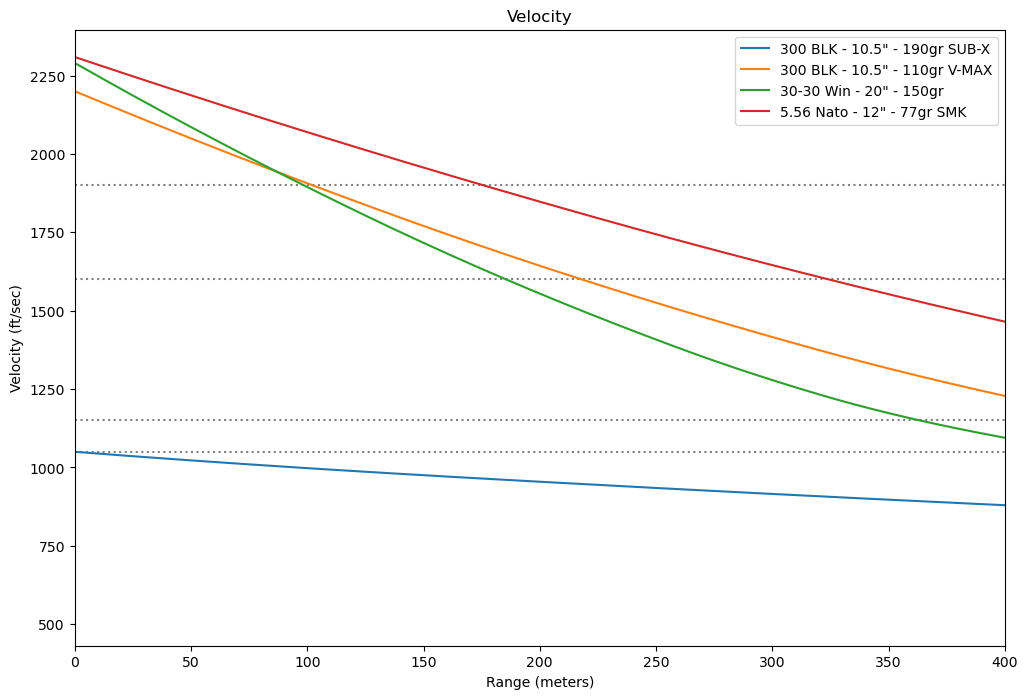

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
columnName = 'velocityFPS'
plt.axhline(y=1900, color='gray', linestyle=':') # Fragmentation velocity
plt.axhline(y=1600, color='gray', linestyle=':') # Expansion velocity
plt.axhline(y=1150, color='gray', linestyle=':') # Trans-Sonic
plt.axhline(y=1050, color='gray', linestyle=':') # Sub-Sonic
plt.title("Velocity")
plt.xlabel("Range (meters)")
plt.ylabel("Velocity (ft/sec)")
for i, df in enumerate(df_array):
    x_data = df['rangeMeters']
    y_data = df[columnName]
    ax.plot(x_data, y_data, label=df.name, color=f'C{i}')
plt.xlim(left=0, right=max_range)
plt.legend()
plt.show()

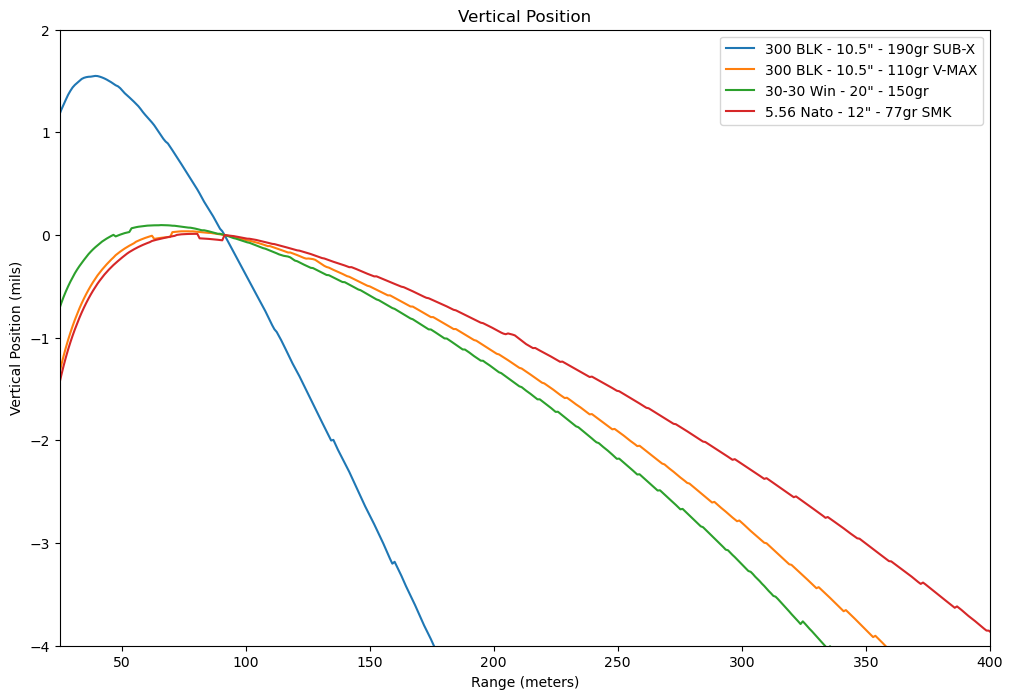

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
columnName = 'verticalPositionMil'
plt.axhline(y=-30, color='gray', linestyle=':') # Limit of most scope adjustments
plt.title("Vertical Position")
plt.xlabel("Range (meters)")
plt.ylabel("Vertical Position (mils)")
for i, df in enumerate(df_array):
    x_data = df['rangeMeters']
    y_data = -df[columnName]
    ax.plot(x_data, y_data, label=df.name, color=f'C{i}')
plt.xlim(left=25, right=max_range)
if(type == 'short'):
    plt.ylim(bottom=-4, top=2)
else:
    plt.ylim(bottom=-30, top=1)
plt.legend()
plt.show()

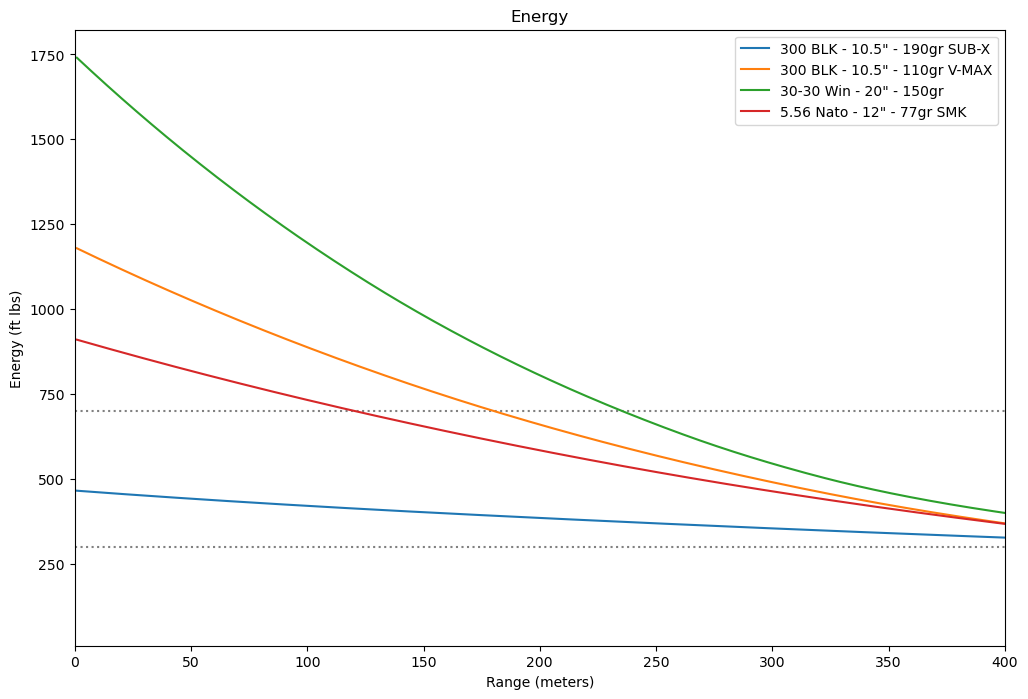

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
columnName = 'energyFtLbs'
plt.title("Energy")
plt.xlabel("Range (meters)")
plt.ylabel("Energy (ft lbs)")
plt.axhline(y=300, color='gray', linestyle=':') # Self Defense
plt.axhline(y=700, color='gray', linestyle=':') # Deer
for i, df in enumerate(df_array):
    x_data = df['rangeMeters']
    y_data = df[columnName]
    ax.plot(x_data, y_data, label=df.name, color=f'C{i}')
plt.xlim(left=0, right=max_range)
plt.legend()
plt.show()